In [166]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

import pandas as pd

In [167]:
dfH = pd.read_csv('housing.csv')
dfH.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Text(0.5, 1.0, 'ocean_proximity')

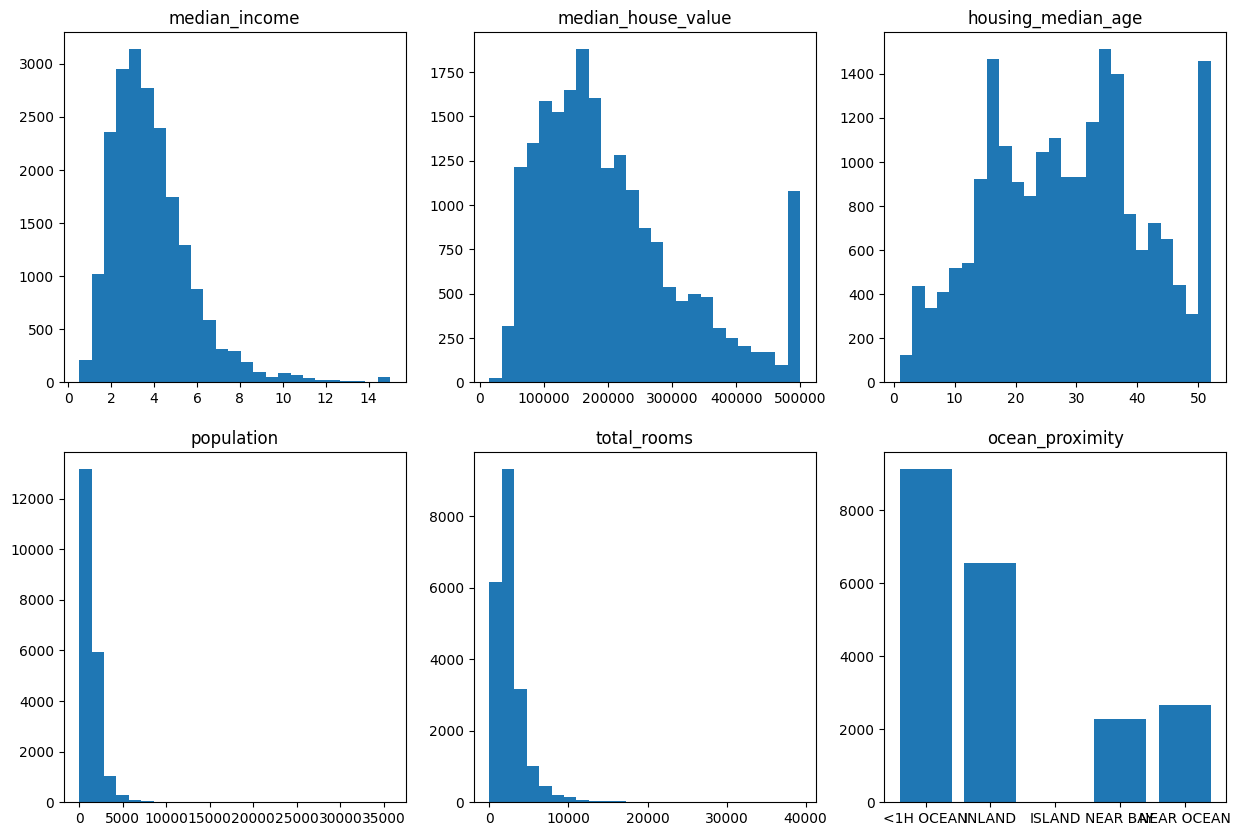

In [168]:
diOP = dfH.groupby(['ocean_proximity']).size().to_dict()

fig, ax = plt.subplots(2,3,figsize=(15,10))

ax[0,0].hist(dfH['median_income'], bins=25)
ax[0,0].set_title('median_income')
ax[0,1].hist(dfH['median_house_value'], bins=25)
ax[0,1].set_title('median_house_value')
ax[0,2].hist(dfH['housing_median_age'], bins=25)
ax[0,2].set_title('housing_median_age')
ax[1,0].hist(dfH['population'], bins=25)
ax[1,0].set_title('population')
ax[1,1].hist(dfH['total_rooms'], bins=25)
ax[1,1].set_title('total_rooms')
ax[1,2].bar(x=list(diOP.keys()), height=list(diOP.values()))
ax[1,2].set_title('ocean_proximity')


[Text(1, 0, 'INLAND'),
 Text(2, 0, '<1H OCEAN'),
 Text(3, 0, 'NEAR OCEAN'),
 Text(4, 0, 'NEAR BAY'),
 Text(5, 0, 'ISLAND')]

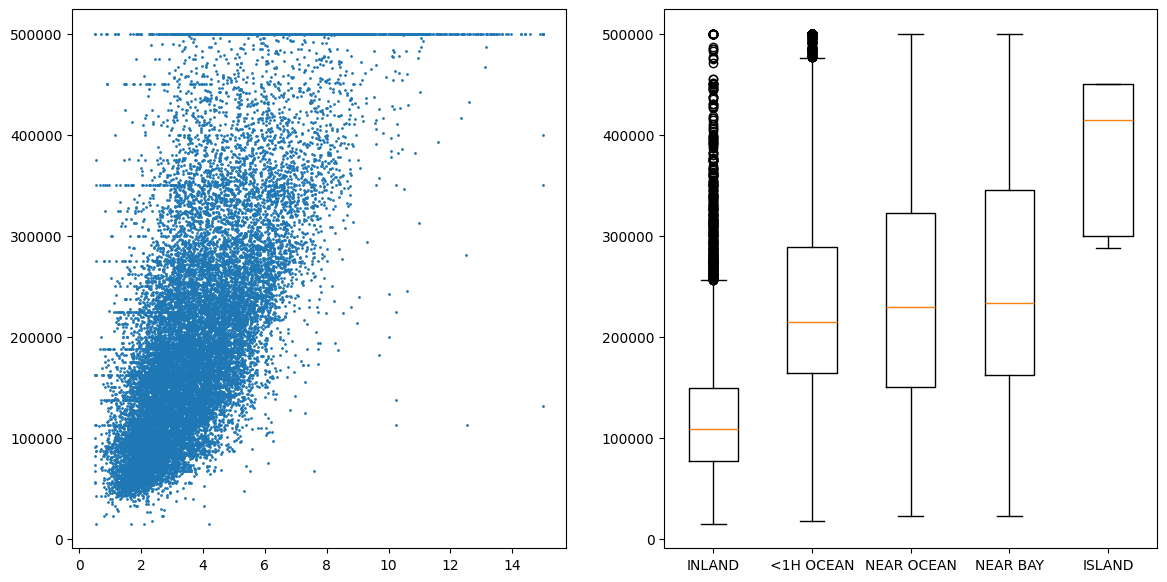

In [169]:
fig, ax = plt.subplots(1,2,figsize=(14,7))

inland = dfH.loc[dfH['ocean_proximity'] == 'INLAND']['median_house_value']
near_ocean = dfH.loc[dfH['ocean_proximity'] == 'NEAR OCEAN']['median_house_value']
near_bay = dfH.loc[dfH['ocean_proximity'] == 'NEAR BAY']['median_house_value']
ocean_1h = dfH.loc[dfH['ocean_proximity'] == '<1H OCEAN']['median_house_value']
island = dfH.loc[dfH['ocean_proximity'] == 'ISLAND']['median_house_value']

ax[0].scatter(dfH['median_income'], dfH['median_house_value'], s=1)
ax[1].boxplot([inland,ocean_1h,near_ocean,near_bay,island])
ax[1].set_xticklabels(['INLAND','<1H OCEAN','NEAR OCEAN','NEAR BAY','ISLAND'])


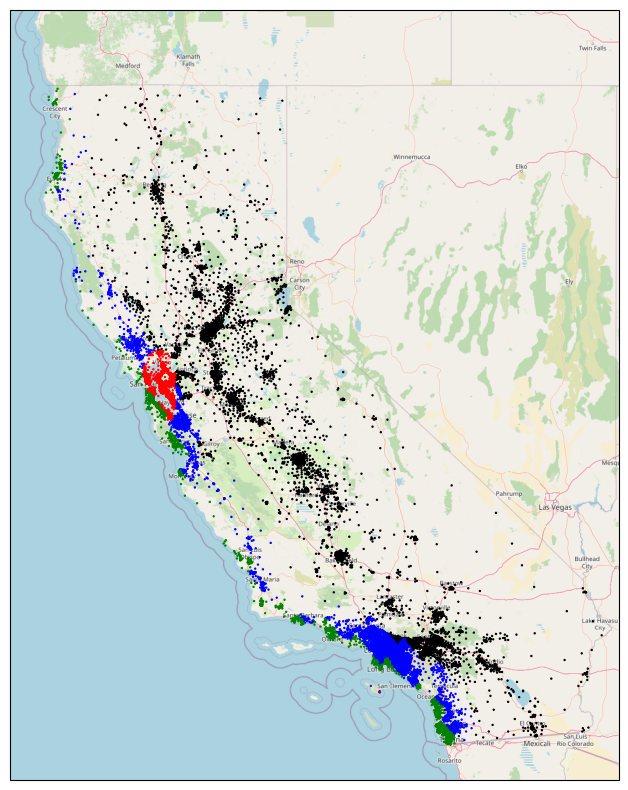

In [170]:
dfH['colors'] = 'black'
dfH.loc[dfH['ocean_proximity'] == 'NEAR BAY', 'colors'] = 'red'
dfH.loc[dfH['ocean_proximity'] == 'NEAR OCEAN', 'colors'] = 'green'
dfH.loc[dfH['ocean_proximity'] == '<1H OCEAN', 'colors'] = 'blue'
dfH.loc[dfH['ocean_proximity'] == 'ISLAND', 'colors'] = 'purple'

request = cimgt.OSM()

# Bounds: (lon_min, lon_max, lat_min, lat_max):
extent = [-125 , -114, 32, 43]

fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': request.crs})
ax.set_extent(extent)
ax.add_image(request, 7)

# Just some random points/lines:
ax.scatter(dfH['longitude'], dfH['latitude'], s=0.5, c=dfH['colors'], transform=ccrs.PlateCarree())


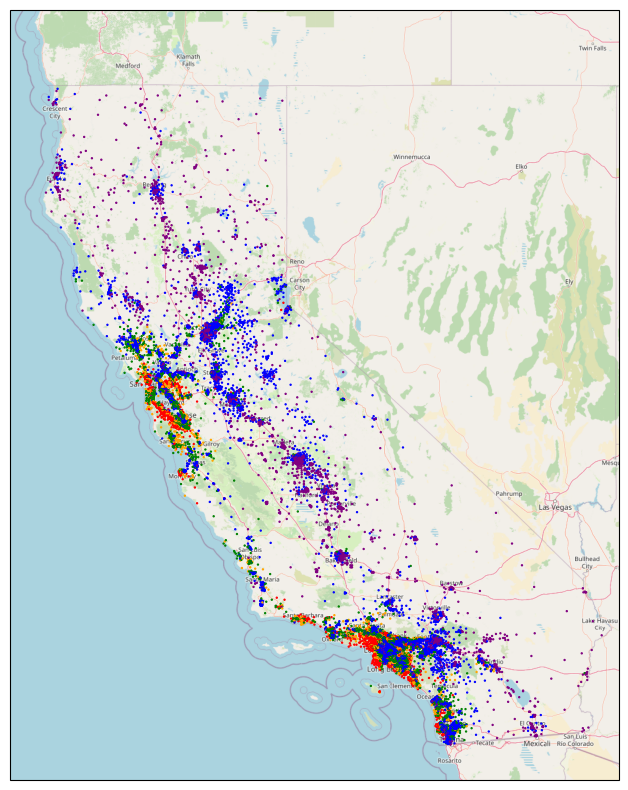

In [171]:
dfH['colors'] = 'red'
dfH.loc[dfH['median_house_value'] < 400000, 'colors'] = 'orange'
dfH.loc[dfH['median_house_value'] < 300000, 'colors'] = 'green'
dfH.loc[dfH['median_house_value'] < 200000, 'colors'] = 'blue'
dfH.loc[dfH['median_house_value'] < 100000, 'colors'] = 'purple'

request = cimgt.OSM()

# Bounds: (lon_min, lon_max, lat_min, lat_max):
extent = [-125 , -114, 32, 43]

fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': request.crs})
ax.set_extent(extent)
ax.add_image(request, 7)

# Just some random points/lines:
ax.scatter(dfH['longitude'], dfH['latitude'], s=0.5, c=dfH['colors'], transform=ccrs.PlateCarree())